In [1]:
import os
import random
import numpy as np
import pandas as pd
import collections
from itertools import chain
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings; warnings.filterwarnings(action='once')


# Settings for visualization
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.head(5)


,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


# Предобработка датасета

In [3]:
answer_ls = [] 
# создадим список с ответами. сюда будем добавлять ответы по мере прохождения теста
# сюда можем вписать создание новых колонок в датасете

# 1. У какого фильма из списка самый большой бюджет?
Варианты ответов:
1. The Dark Knight Rises (tt1345836)
2. Spider-Man 3 (tt0413300)
3. Avengers: Age of Ultron (tt2395427)
4. The Warrior's Way	(tt1032751)
5. Pirates of the Caribbean: On Stranger Tides (tt1298650)

In [4]:
import pandas as pd
data = pd.read_csv('data.csv')

data = data[data.budget == data.budget.max()].original_title

answer_ls.append((data.loc[data.index[0]]))

print('Film with biggest budget is {}'.format((data.loc[data.index[0]])))

Film with biggest budget is The Warrior's Way


# 2. Какой из фильмов самый длительный (в минутах)
1. The Lord of the Rings: The Return of the King	(tt0167260)
2. Gods and Generals	(tt0279111)
3. King Kong	(tt0360717)
4. Pearl Harbor	(tt0213149)
5. Alexander	(tt0346491)

In [5]:
import pandas as pd
data = pd.read_csv('data.csv')

data = data[data.runtime == data.runtime.max()].original_title

answer_ls.append(data.loc[data.index[0]])

print('The most durable film is {}'.format((data.loc[data.index[0]])))

The most durable film is Gods and Generals


# 3. Какой из фильмов самый короткий (в минутах)
Варианты ответов:

1. Home on the Range	tt0299172
2. The Jungle Book 2	tt0283426
3. Winnie the Pooh	tt1449283
4. Corpse Bride	tt0121164
5. Hoodwinked!	tt0443536

In [6]:
import pandas as pd
data = pd.read_csv('data.csv')

data = data[data.runtime == data.runtime.min()].original_title

answer_ls.append(data.loc[data.index[0]])

print('The most short film is {}'.format((data.loc[data.index[0]])))

The most short film is Winnie the Pooh


# 4. Средняя длительность фильма?

Варианты ответов:
1. 115
2. 110
3. 105
4. 120
5. 100


In [7]:
import pandas as pd
data = pd.read_csv('data.csv')

data = data.runtime.mean()

answer_ls.append(round(data))

print('Average movie length {} minutes'.format(round(data)))

Average movie length 110 minutes


# 5. Средняя длительность фильма по медиане?
Варианты ответов:
1. 106
2. 112
3. 101
4. 120
5. 115




In [8]:
import pandas as pd
data = pd.read_csv('data.csv')

data = data.runtime.median()

answer_ls.append(round(data))

print('Average median movie length {} minutes'.format(round(data)))

Average median movie length 106 minutes


# 6. Какой самый прибыльный фильм?
Варианты ответов:
1. The Avengers	tt0848228
2. Minions	tt2293640
3. Star Wars: The Force Awakens	tt2488496
4. Furious 7	tt2820852
5. Avatar	tt0499549

In [9]:
import pandas as pd
data = pd.read_csv('data.csv')

data['Profit'] = data['revenue'] - data['budget'] 
data = data[data.Profit == data.Profit.max()].original_title

answer_ls.append(data.loc[data.index[0]])

print('Most profitable movie is {} '.format(data.loc[data.index[0]]))

Most profitable movie is Avatar 


# 7. Какой фильм самый убыточный?
Варианты ответов:
1. Supernova tt0134983
2. The Warrior's Way tt1032751
3. Flushed Away	tt0424095
4. The Adventures of Pluto Nash	tt0180052
5. The Lone Ranger	tt1210819

In [10]:
import pandas as pd
data = pd.read_csv('data.csv')

data['Profit'] = data['revenue'] - data['budget'] 
data = data[data.Profit == data.Profit.min()].original_title

answer_ls.append(data.loc[data.index[0]])

print('Most unprofitable movie is {} '.format(data.loc[data.index[0]]))

Most unprofitable movie is The Warrior's Way 


# 8. Сколько всего фильмов в прибыли?
Варианты ответов:
1. 1478
2. 1520
3. 1241
4. 1135
5. 1398


In [11]:
import pandas as pd
data = pd.read_csv('data.csv')

data = data[data.revenue > data.budget].original_title.count()

answer_ls.append(data)

print('Number of profitable movie is {} '.format(data))

Number of profitable movie is 1478 


# 9. Самый прибыльный фильм в 2008 году?
Варианты ответов:
1. Madagascar: Escape 2 Africa	tt0479952
2. Iron Man	tt0371746
3. Kung Fu Panda	tt0441773
4. The Dark Knight	tt0468569
5. Mamma Mia!	tt0795421

In [12]:
import pandas as pd
data = pd.read_csv('data.csv')

data['Profit'] = data['revenue'] - data['budget'] 
data = data[data.release_year == 2008][['Profit','original_title']]
data = data[data.Profit == data.Profit.max()].original_title

answer_ls.append(data.loc[data.index[0]])

print('Most profitable movie in 2008 is {} '.format(data.loc[data.index[0]]))

Most profitable movie in 2008 is The Dark Knight 


# 10. Самый убыточный фильм за период с 2012 по 2014 (включительно)?
Варианты ответов:
1. Winter's Tale	tt1837709
2. Stolen	tt1656186
3. Broken City	tt1235522
4. Upside Down	tt1374992
5. The Lone Ranger	tt1210819


In [13]:
import pandas as pd
data = pd.read_csv('data.csv')

data['Profit'] = data['revenue'] - data['budget'] 
data = data.drop_duplicates('original_title')

data = data.loc[(data.release_year == 2012) | (data.release_year == 2013) | (data.release_year == 2014),['Profit','original_title']]
data = data[data.Profit == data.Profit.min()].original_title

answer_ls.append(data.loc[data.index[0]])

print('Most unprofitable movie in period 2012 - 2014 years is {} '.format(data.loc[data.index[0]]))

Most unprofitable movie in period 2012 - 2014 years is The Lone Ranger 


# 11. Какого жанра фильмов больше всего?
Варианты ответов:
1. Action
2. Adventure
3. Drama
4. Comedy
5. Thriller

Most often make a movie of the genre: Drama


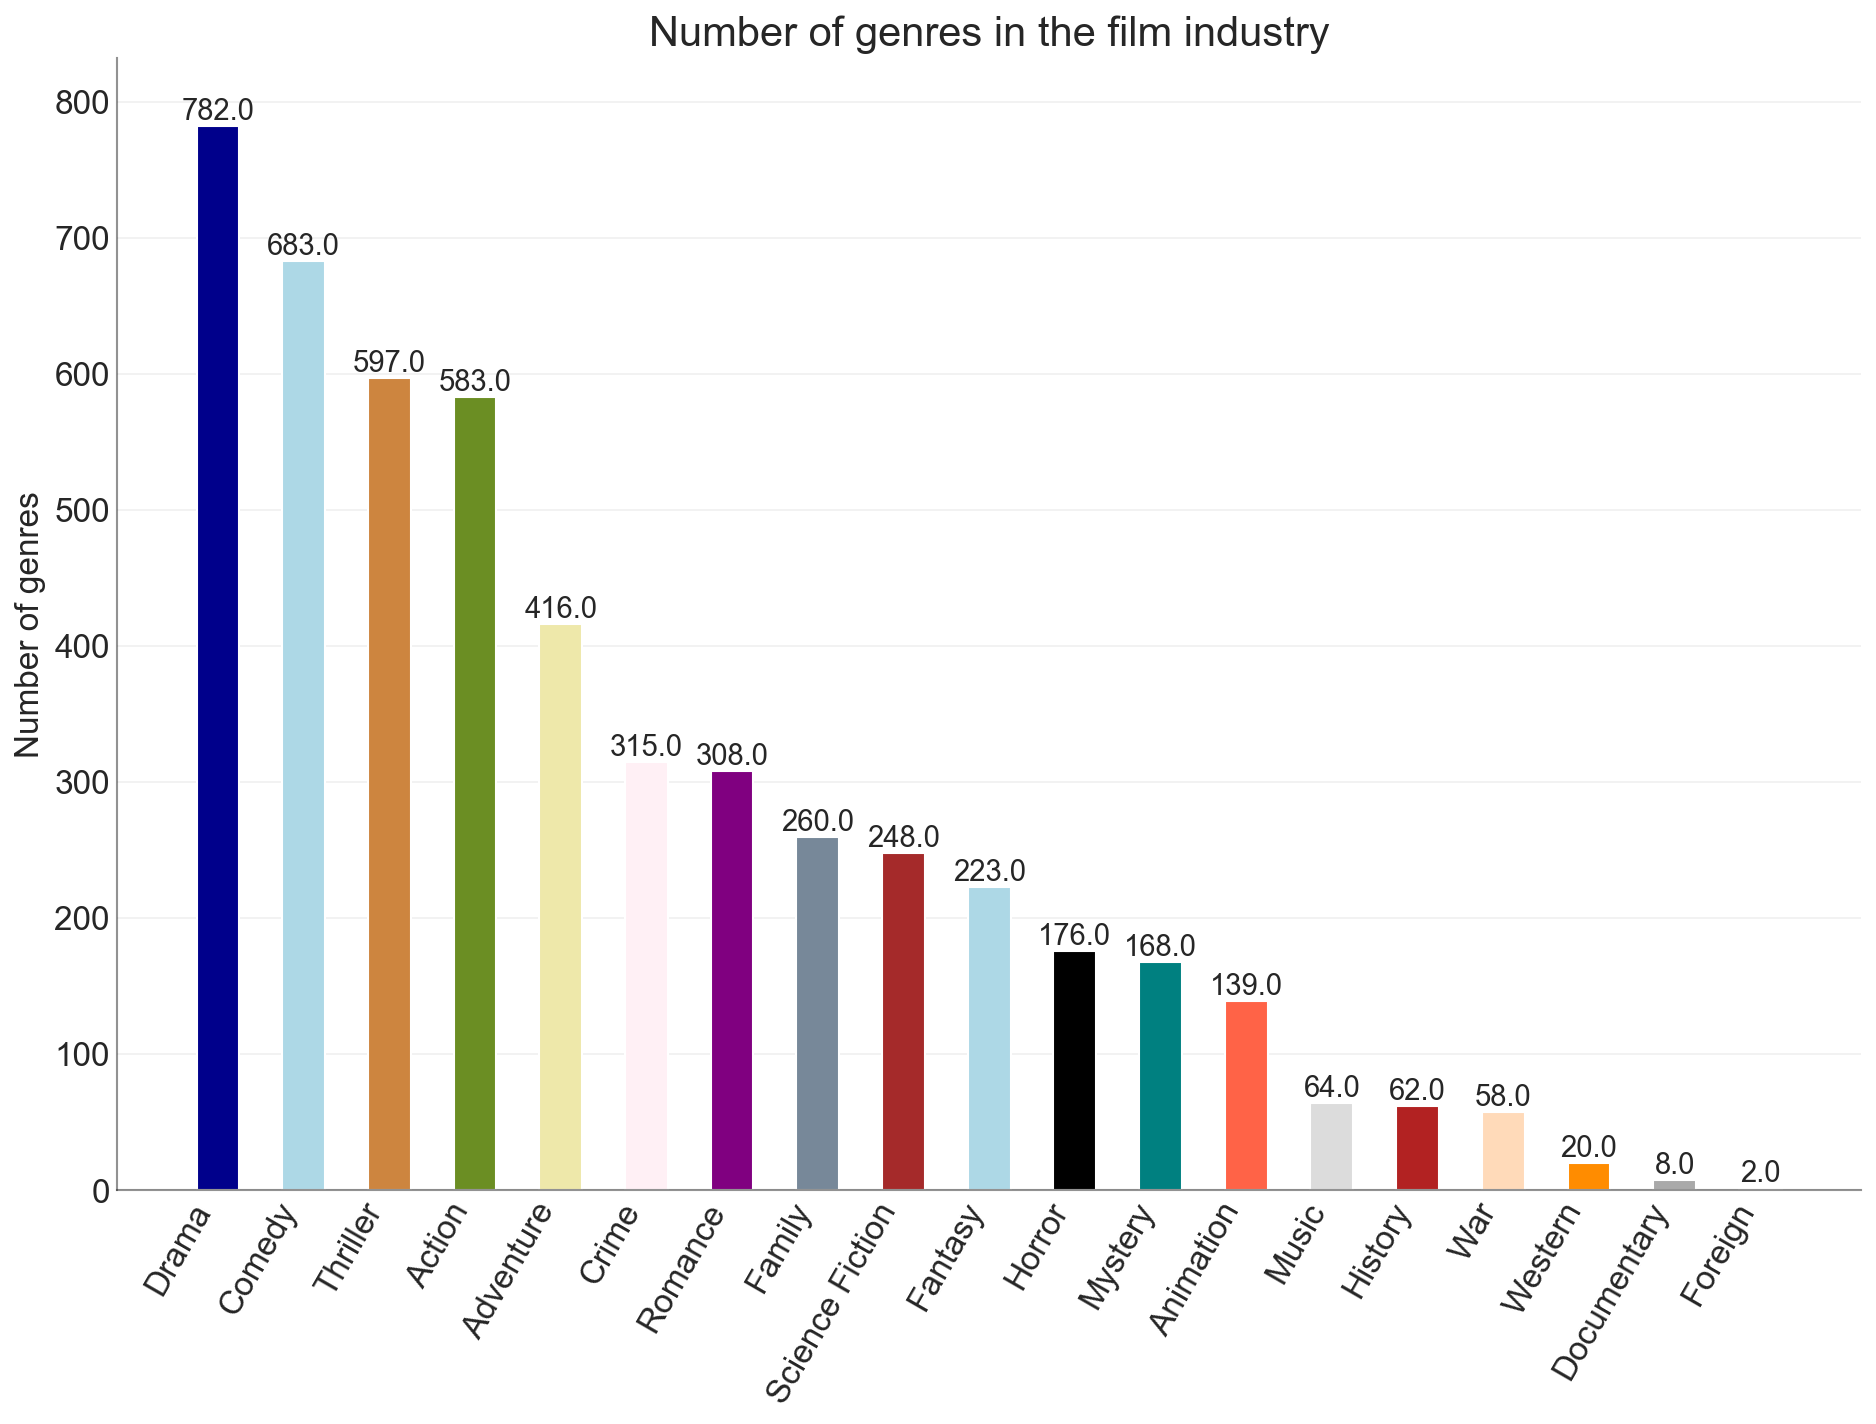

In [14]:
import pandas as pd
data = pd.read_csv('data.csv')

# We wii divide the set of values for each cell
data['genres'] = data.genres.apply(lambda x: x.split('|'))

# Create a list with all counts of genres
total_genres = data.genres.sum()

# Create new Series only for genres
dt = pd.Series(total_genres).value_counts()

answer_ls.append(dt.index[0])

# Generate colors for our graphic
n = len(dt)
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Create figure
plt.figure(figsize=(15,10), dpi= 150, )
plt.bar(dt.index, dt, color=c, width=.5)
for i, val in enumerate(dt.values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':14})

# Decoration
plt.gca().set_xticklabels(dt.index, rotation=60, horizontalalignment= 'right')
plt.title("Number of genres in the film industry", fontsize=20)
plt.ylabel('Number of genres')
plt.ylim(0, (dt.max()+50))
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5) 

print('Most often make a movie of the genre: {}'.format(dt.index[0]))
plt.show()


# 12. Какого жанра среди прибыльных фильмов больше всего?
Варианты ответов:
1. Drama
2. Comedy
3. Action
4. Thriller
5. Adventure

Most profitable movie genre is Drama


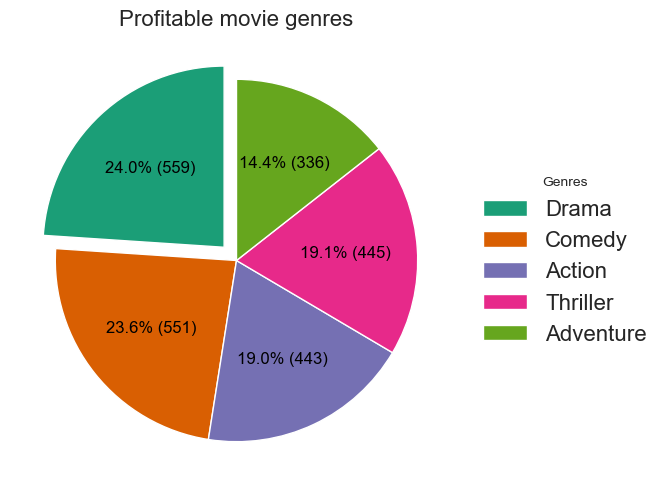

In [15]:
import pandas as pd
pd.options.mode.chained_assignment = None
data = pd.read_csv('data.csv')

# Filtering dataframe
data = data[data['revenue'] > data['budget']]

#This is the same algorithm that we used above
data['genres'] = data.genres.apply(lambda x: x.split('|'))
total_genres = data.genres.sum()
dt = pd.Series(total_genres).value_counts()

# Check the genres indicated in the answer options
dt = dt.loc[['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure']]

answer_ls.append(dt.index[0])

# Draw Plot
fig, ax = plt.subplots(figsize=(11, 6), subplot_kw=dict(aspect="equal"), dpi= 100)

data = dt
categories = dt.index
explode = [0.1,0,0,0,0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="k"), 
                                  colors=plt.cm.Dark2.colors,
                                  startangle=90,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Genres", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12, weight=500)
ax.set_title("Profitable movie genres")

print('Most profitable movie genre is {}'.format(dt.index[0]))
plt.show()

# 13. Кто из режиссеров снял больше всего фильмов?
Варианты ответов:
1. Steven Spielberg
2. Ridley Scott 
3. Steven Soderbergh
4. Christopher Nolan
5. Clint Eastwood

The most productive director Steven Soderbergh


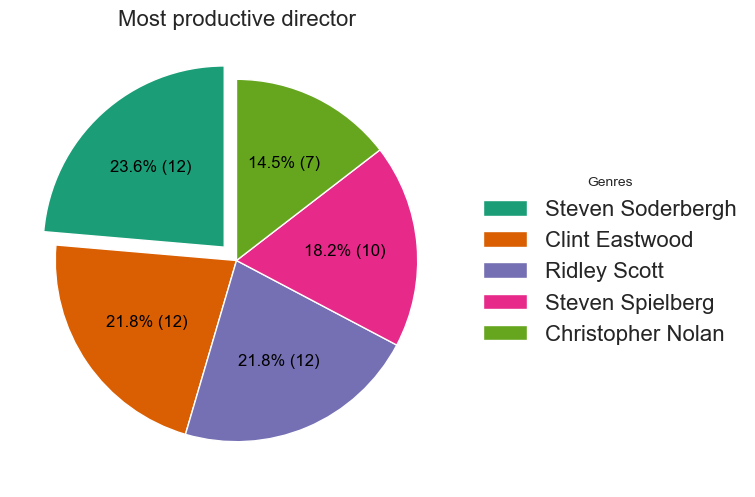

In [16]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and grouping data by director
data = data.set_index('director')
dt = data.groupby(['director'])['original_title'].count().sort_values(ascending=False)

answer_ls.append(dt.index[0])

# Check the genres indicated in the answer options
dt = dt.loc[['Steven Spielberg','Ridley Scott','Steven Soderbergh','Christopher Nolan','Clint Eastwood']].sort_values(ascending=False)


# Draw Plot
fig, ax = plt.subplots(figsize=(11, 6), subplot_kw=dict(aspect="equal"), dpi= 100)

data = dt
categories = dt.index
explode = [0.1,0,0,0,0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="k"), 
                                  colors=plt.cm.Dark2.colors,
                                  startangle=90,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Genres", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12, weight=500)
ax.set_title("Most productive director")

print('The most productive director {}'.format(dt.index[0]))
plt.show()

# 14. Кто из режиссеров снял больше всего Прибыльных фильмов?
Варианты ответов:
1. Steven Soderbergh
2. Clint Eastwood
3. Steven Spielberg
4. Ridley Scott
5. Christopher Nolan

Most productive and profitable director is Ridley Scott


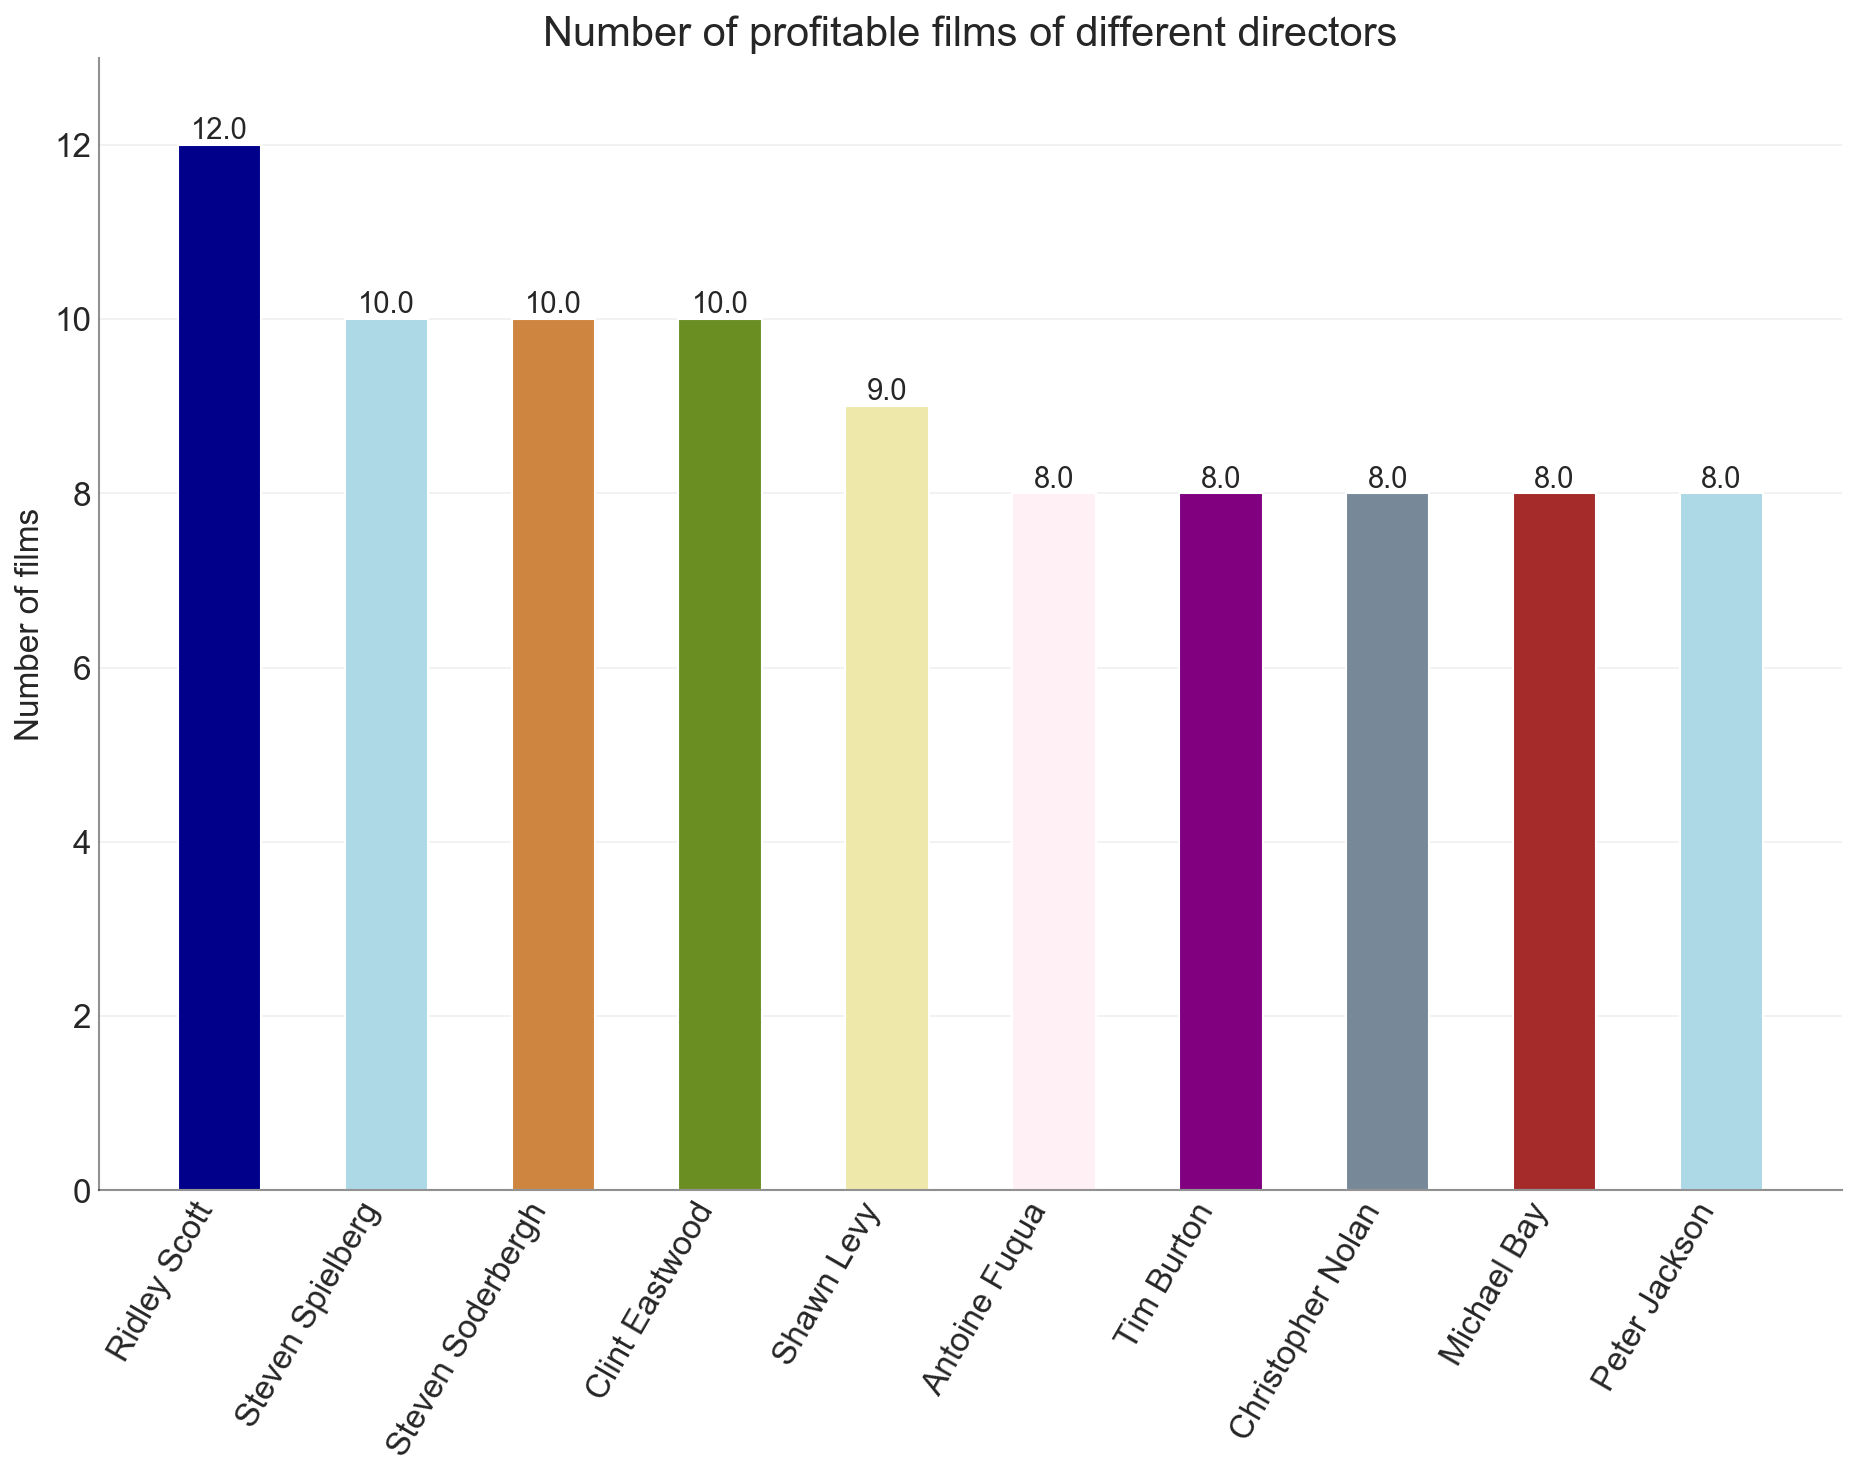

In [17]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and grouping data by director
data = data[data['revenue'] > data['budget']]
data = data.set_index('director')
dt = data.groupby(['director'])['original_title'].count().sort_values(ascending=False)
dt = dt[:10] # let's look top 10

answer_ls.append(dt.index[0])

# Generate colors for our graphic
n = len(dt)
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Create figure
plt.figure(figsize=(15,10), dpi= 150)
plt.bar(dt.index, dt, color=c, width=.5)
for i, val in enumerate(dt.values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':14})

# Decoration
plt.gca().set_xticklabels(dt.index, rotation=60, horizontalalignment= 'right')
plt.title("Number of profitable films of different directors", fontsize=20)
plt.ylabel('Number of films')
plt.ylim(0, (dt.max()+1))
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5) 

print('Most productive and profitable director is {}'.format(dt.index[0]))
plt.show()


# 15. Кто из режиссеров принес больше всего прибыли?
Варианты ответов:
1. Steven Spielberg
2. Christopher Nolan
3. David Yates
4. James Cameron
5. Peter Jackson


In [18]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and grouping data by director
data = data.set_index('director')
data['Profit'] = data['revenue'] - data['budget'] 
dt = data.groupby(['director'])['Profit'].sum().sort_values(ascending=False)
dt = dt[:10]

answer_ls.append(dt.index[0])

print('Most productive and profitable director is {}'.format(dt.index[0]))

Most productive and profitable director is Peter Jackson


# 16. Какой актер принес больше всего прибыли?
Варианты ответов:
1. Emma Watson
2. Johnny Depp
3. Michelle Rodriguez
4. Orlando Bloom
5. Rupert Grint

In [19]:
import pandas as pd
data = pd.read_csv('data.csv')

data['Profit'] = data['revenue'] - data['budget'] 

# Function of splitting a cell list and creating individual values
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

# Lenght of divided list
l = data['cast'].str.split('|').map(len)

# Creating new dataframe 
dt = pd.DataFrame({'Profit': np.repeat(data['Profit'],l),'Cast': chainer(data['cast'])})

# Filtering and grouping data
dt = dt.groupby(['Cast'])['Profit'].sum().sort_values(ascending=False)

answer_ls.append(dt.index[0])

print('Most productive and profitable actor is {}'.format(dt.index[0]))

Most productive and profitable actor is Emma Watson


# 17. Какой актер принес меньше всего прибыли в 2012 году?
Варианты ответов:
1. Nicolas Cage
2. Danny Huston
3. Kirsten Dunst
4. Jim Sturgess
5. Sami Gayle

In [20]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and agregating dataframe
data['Profit'] = data['revenue'] - data['budget'] 
data = data[data.release_year == 2012]

#This is the same algorithm that we used above
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
       
l = data['cast'].str.split('|').map(len)

dt = pd.DataFrame({'Profit': np.repeat(data['Profit'],l),'Cast': chainer(data['cast'])})
dt = dt.groupby(['Cast'])['Profit'].sum().sort_values(ascending=True)

answer_ls.append(dt.index[0])

print('Most unprofitable actor in 2012 year is {}'.format(dt.index[0]))

Most unprofitable actor in 2012 year is Kirsten Dunst


# 18. Какой актер снялся в большем количестве высокобюджетных фильмов? (в фильмах где бюджет выше среднего по данной выборке)
Варианты ответов:
1. Tom Cruise
2. Mark Wahlberg 
3. Matt Damon
4. Angelina Jolie
5. Adam Sandler

Actor starred in more high-budget films is Matt Damon


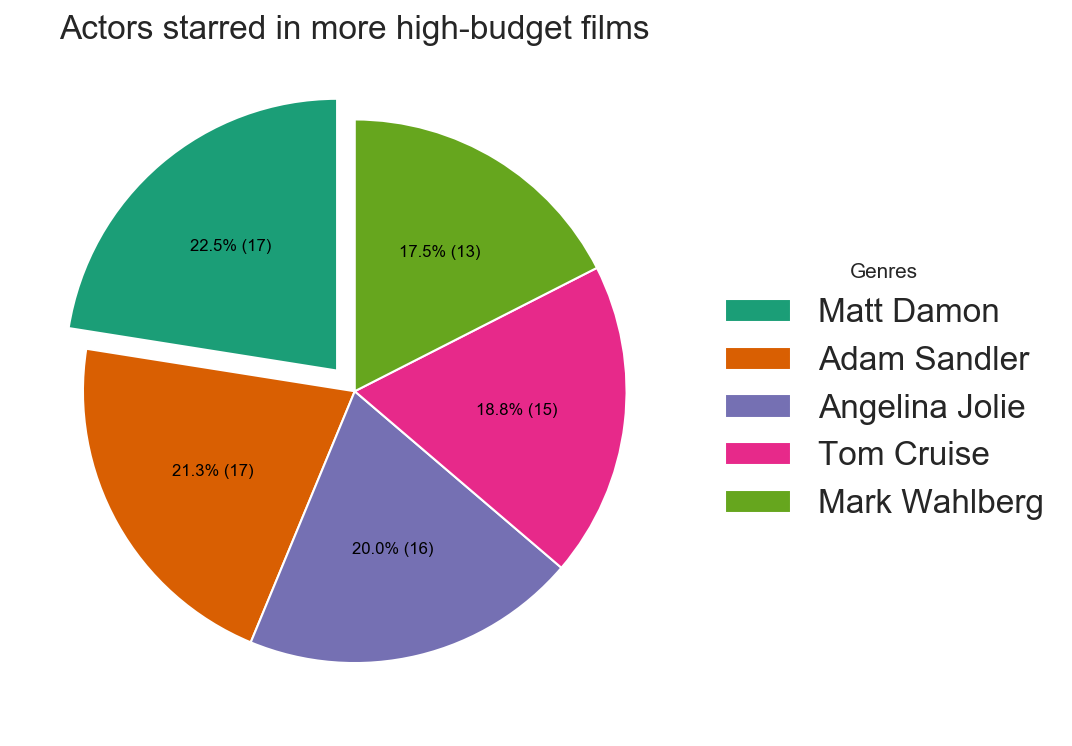

In [21]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and agregating dataframe
data = data[data.budget > data.budget.mean()]
data = data.drop_duplicates('original_title')

#This is the same algorithm that we used above
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
       
l = data['cast'].str.split('|').map(len)

dt = pd.DataFrame({'original_title': np.repeat(data['original_title'],l),'Cast': chainer(data['cast'])})
dt = dt.groupby(['Cast'])['original_title'].count().sort_values(ascending=False)

answer_ls.append(dt.index[0])

# Check the genres indicated in the answer options
dt = dt.loc[['Tom Cruise','Mark Wahlberg','Matt Damon','Angelina Jolie','Adam Sandler']].sort_values(ascending=False)

# Draw Plot
fig, ax = plt.subplots(figsize=(11, 6), subplot_kw=dict(aspect="equal"), dpi= 150)

data = dt[:10]
categories = dt.index
explode = [0.1,0,0,0,0]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="k"), 
                                  colors=plt.cm.Dark2.colors,
                                  startangle=90,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Genres", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight=500)
ax.set_title("Actors starred in more high-budget films")

print('Actor starred in more high-budget films is {}'.format(dt.index[0]))

plt.show()

# 19. В фильмах какого жанра больше всего снимался Nicolas Cage?  
Варианты ответа:
1. Drama
2. Action
3. Thriller
4. Adventure
5. Crime

Nicolas Cage likes to act in this genre of cinema - Action


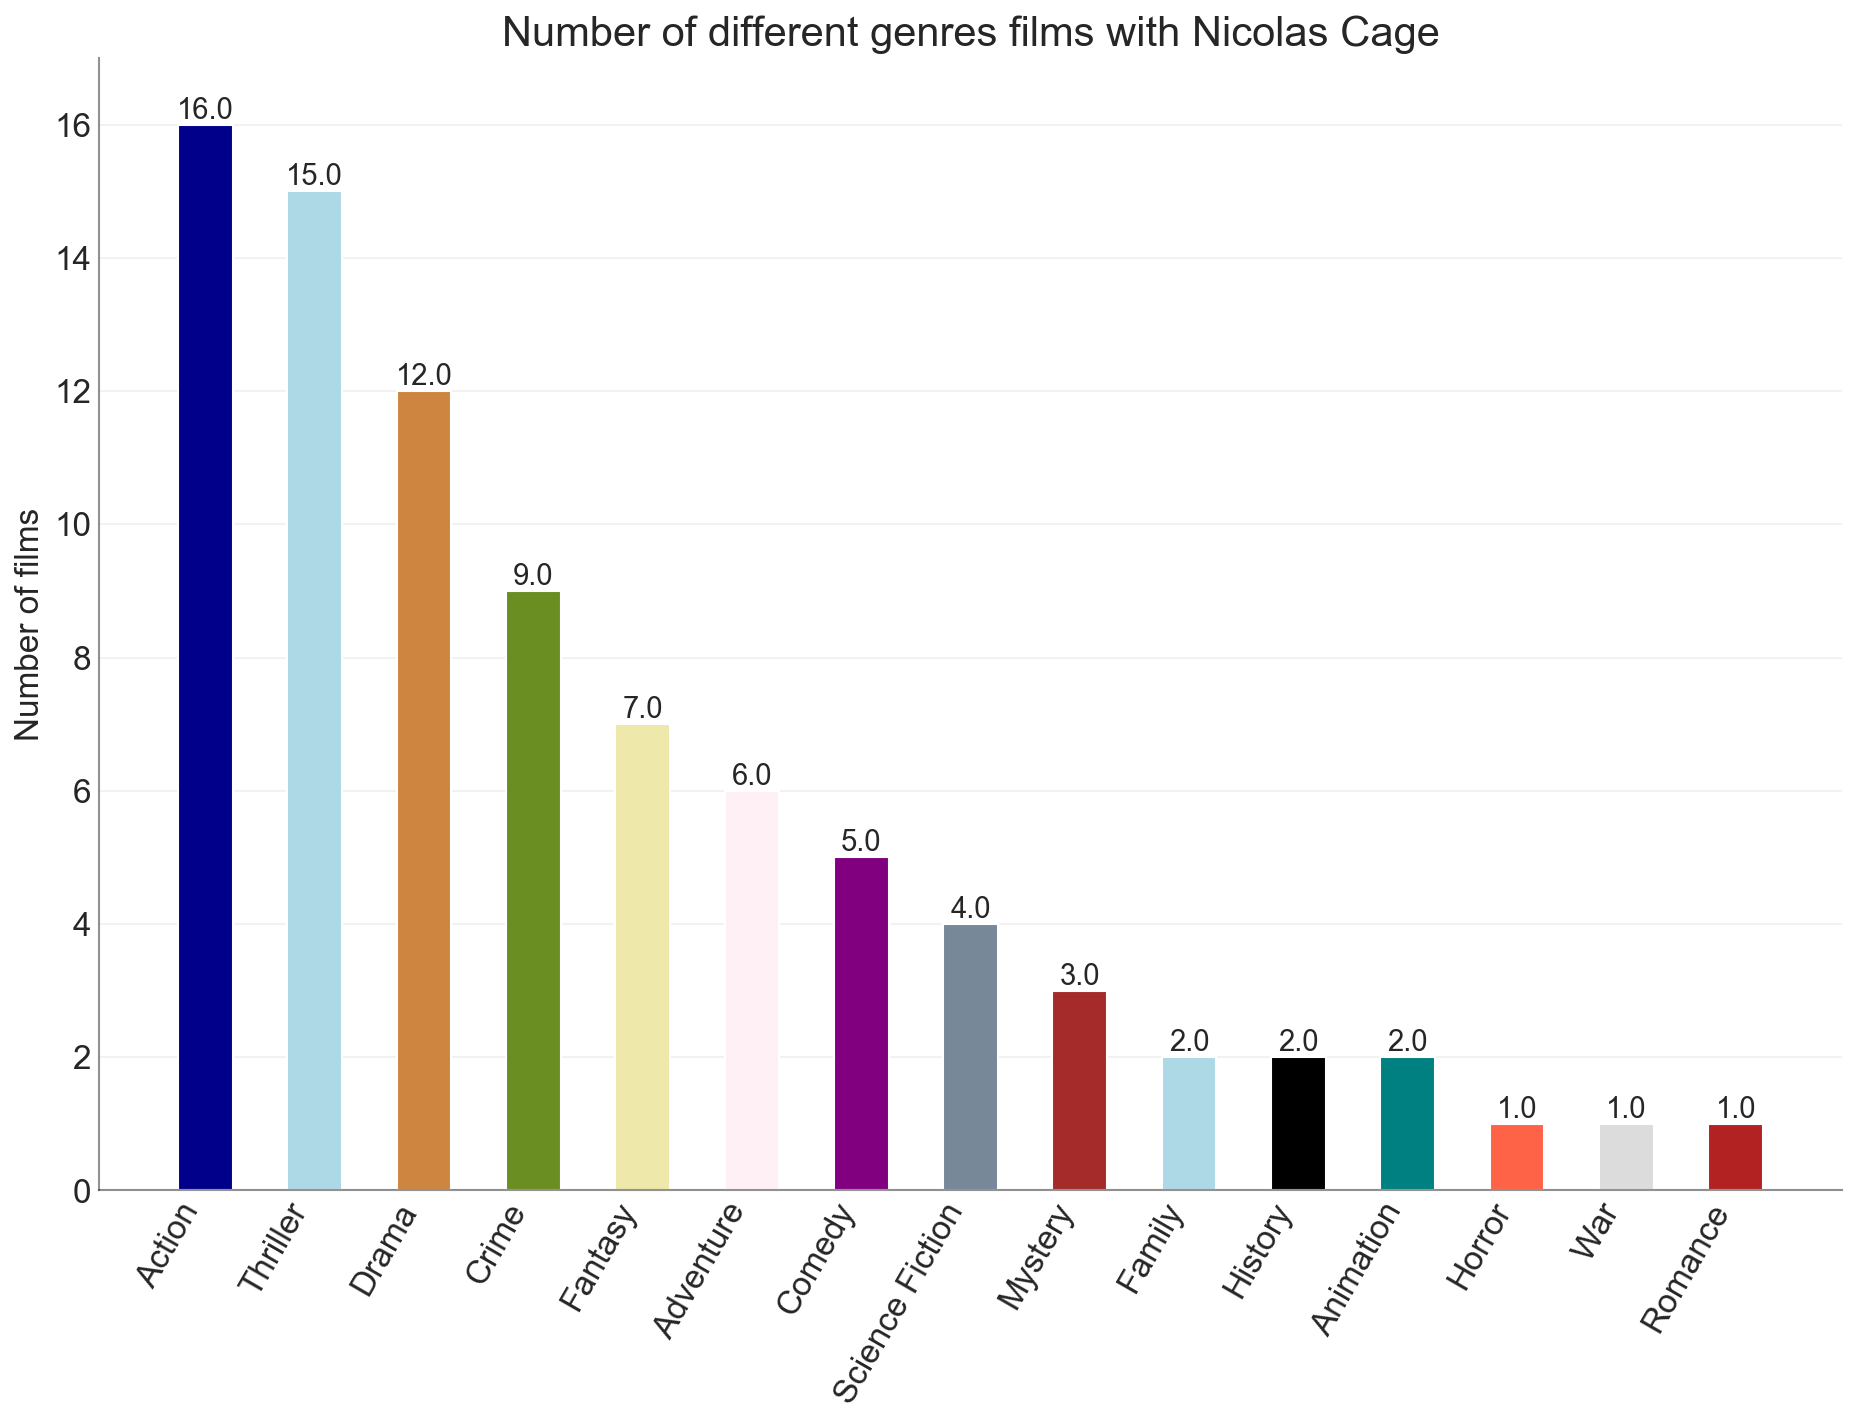

In [22]:
import pandas as pd
pd.options.mode.chained_assignment = None
data = pd.read_csv('data.csv')

# Filtering dataframe
df = data[data.cast.str.match("Nicolas Cage", na=False)]

# Divide cellc in column "genres" and create new dataframe
s=[]
df['genres'] = df.genres.apply(lambda x: x.split('|'))
for i in df['genres']:
    for j in i:
        s.append(j)
        
dt = pd.DataFrame(s, columns = ['Genre'])
dt = dt['Genre'].value_counts()

answer_ls.append(dt.index[0])

# Generate colors for our graphic
n = len(dt)
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Create figure
plt.figure(figsize=(15,10), dpi= 150)
plt.bar(dt.index, dt, color=c, width=.5)
for i, val in enumerate(dt.values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':14})

# Decoration
plt.gca().set_xticklabels(dt.index, rotation=60, horizontalalignment= 'right')
plt.title("Number of different genres films with Nicolas Cage", fontsize=20)
plt.ylabel('Number of films')
plt.ylim(0, (dt.max()+1))
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5) 

print('Nicolas Cage likes to act in this genre of cinema - {}'.format(dt.index[0]))
plt.show()

# 20. Какая студия сняла больше всего фильмов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Paramount Pictures
3. Columbia Pictures
4. Warner Bros
5. Twentieth Century Fox Film Corporation

In [23]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and dividind cells in dataframe
data['production_companies'] = data.production_companies.apply(lambda x: x.split('|'))
pr_comp = data['production_companies'].sum()

# Creating new dataframe
dt = pd.Series(pr_comp).value_counts()
answer_ls.append(dt.index[0])

print('{} made the most films'.format(dt.index[0]))

Universal Pictures made the most films


# 21. Какая студия сняла больше всего фильмов в 2015 году?
Варианты ответа:
1. Universal Pictures
2. Paramount Pictures
3. Columbia Pictures
4. Warner Bros
5. Twentieth Century Fox Film Corporation

In [24]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and dividind cells in dataframe
data = data[data.release_year == 2015]
data['production_companies'] = data.production_companies.apply(lambda x: x.split('|'))
pr_comp = data['production_companies'].sum()

# Creating new dataframe
dt = pd.Series(pr_comp).value_counts()
answer_ls.append(dt.index[0])

print('{} made the most films in 2015 year'.format(dt.index[0]))

Warner Bros. made the most films in 2015 year


# 22. Какая студия заработала больше всего денег в жанре комедий за все время?
Варианты ответа:
1. Warner Bros
2. Universal Pictures (Universal)
3. Columbia Pictures
4. Paramount Pictures
5. Walt Disney

In [25]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering data by new column
data['Profit'] = data['revenue'] - data['budget'] 

# This is the same algorithm that we used above
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
       
l1 = data['genres'].str.split('|').map(len)
l2 = data['production_companies'].str.split('|').map(len)

dt = pd.DataFrame({'Profit': np.repeat(data['Profit'],l1),'genres': chainer(data['genres'])})
df = pd.DataFrame({'Profit': np.repeat(data['Profit'],l2),'production_companies': chainer(data['production_companies'])})

#Merge new dataframes
data_new =  dt.merge(df, on = 'Profit', how = 'left')

# Filtering and group new data 
data_new = data_new[data_new.genres == 'Comedy']
data_new = data_new.groupby(['production_companies'])['Profit'].sum().sort_values(ascending=False)

answer_ls.append(data_new.index[0])

print('{} studio has earned the most money in the comedy genre of all time'.format(data_new.index[0]))

Universal Pictures studio has earned the most money in the comedy genre of all time


# 23. Какая студия заработала больше всего денег в 2012 году?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Columbia Pictures
4. Paramount Pictures
5. Lucasfilm

In [26]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering data
data['Profit'] = data['revenue'] - data['budget'] 
data = data[data.release_year == 2012]

# This is the same algorithm that we used above
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
       
l = data['production_companies'].str.split('|').map(len)

dt = pd.DataFrame({'Profit': np.repeat(data['Profit'],l),'production_companies': chainer(data['production_companies'])})

# Filtering and grouping data
dt = dt.groupby(['production_companies'])['Profit'].sum().sort_values(ascending=False)

answer_ls.append(dt.index[0])

print('{} studio has earned the most money in 2012 year'.format(dt.index[0]))

Columbia Pictures studio has earned the most money in 2012 year


# 24. Самый убыточный фильм от Paramount Pictures
Варианты ответа:

1. K-19: The Widowmaker tt0267626
2. Next tt0435705
3. Twisted tt0315297
4. The Love Guru tt0811138
5. The Fighter tt0964517

In [27]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and group data
data['Profit'] = data['revenue'] - data['budget'] 
data = data[data.production_companies.str.contains('Paramount Pictures', na = False)]

# Grouping data
data = data.groupby(['original_title'])['Profit'].min().sort_values(ascending=True)

answer_ls.append(data.index[0])

print('{} most unprofitable movie from Paramount Pictures'.format(data.index[0]))

K-19: The Widowmaker most unprofitable movie from Paramount Pictures


# 25. Какой Самый прибыльный год (заработали больше всего)?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2002
5. 2015

In [28]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and group data
data['Profit'] = data['revenue'] - data['budget'] 

# Grouping data
data = data.groupby(['release_year'])['Profit'].sum().sort_values(ascending=False)

answer_ls.append(data.index[0])

print('{} most profitable year'.format(data.index[0]))

2015 most profitable year


# 26. Какой Самый прибыльный год для студии Warner Bros?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2010
5. 2015

In [29]:
import pandas as pd
data = pd.read_csv('data.csv')

# Filtering and group data
data['Profit'] = data['revenue'] - data['budget'] 
data = data[data.production_companies.str.contains('Warner Bros', na = False)]

# Grouping data
data = data.groupby(['release_year'])['Profit'].sum().sort_values(ascending=False)

answer_ls.append(data.index[0])

print('{} most profitable year for Warner Bros'.format(data.index[0]))

2014 most profitable year for Warner Bros


# 27. В каком месяце за все годы суммарно вышло больше всего фильмов?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [30]:
import pandas as pd
data = pd.read_csv('data.csv')
data['release_date'] = pd.to_datetime(data['release_date'])

months = {1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль', 8:'Август', 9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'}
def month_interp(n):
    result = months[n]
    return result

# Filtering and group data
data = data.groupby(data['release_date'].dt.month)['original_title'].count().sort_values(ascending=False)
dt = data.index[0]

result = month_interp(dt)
answer_ls.append(result)

print('{} most profitable year for Warner Bros'.format(result))

Сентябрь most profitable year for Warner Bros


# 28. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)
Варианты ответа:
1. 345
2. 450
3. 478
4. 523
5. 381

In [31]:
import pandas as pd
data = pd.read_csv('data.csv')
data['release_date'] = pd.to_datetime(data['release_date'])

# Filtering data
data = data[(data['release_date'].dt.month == 6) | (data['release_date'].dt.month == 7) | (data['release_date'].dt.month == 8)]

answer_ls.append(len(data))

print('{} films released in the summer'.format(len(data)))

450 films released in the summer


In [32]:
import pandas as pd
data = pd.read_csv('data.csv')
data['release_date'] = pd.to_datetime(data['release_date'])
   
# Filtering  data
data = data[(data['release_date'].dt.month == 12) | (data['release_date'].dt.month == 1) | (data['release_date'].dt.month == 2)]

# This is the same algorithm that we used above
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
       
l = data['director'].str.split('|').map(len)

dt = pd.DataFrame({'original_title': np.repeat(data['original_title'],l),'director': chainer(data['director'])})

# Grouping data
dt = dt.groupby(['director'])['original_title'].count().sort_values(ascending=False)

answer_ls.append(dt.index[0])

print('{} releases most films in winter'.format(dt.index[0]))

Peter Jackson releases most films in winter


# 29. Какой режисер выпускает (суммарно по годам) больше всего фильмов зимой?
Варианты ответов:
1. Steven Soderbergh
2. Christopher Nolan
3. Clint Eastwood
4. Ridley Scott
5. Peter Jackson

# 30. Какой месяц чаще всего по годам самый прибыльный?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [33]:
import pandas as pd
data = pd.read_csv('data.csv')
data['release_date'] = pd.to_datetime(data['release_date'])

months = {1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль', 8:'Август', 9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'}
def month_interp(n):
    result = months[n]
    return result

# Filtering and group data
data['Profit'] = data['revenue'] - data['budget'] 

# Grouping data
data = data.groupby([data['release_date'].dt.month,'release_year'])['Profit'].sum().sort_values(ascending=False)
dt = data.index[0][0]

result = month_interp(dt)
answer_ls.append(result)

print('{} most profit month'.format(result))

Июнь most profit month


# 31. Названия фильмов какой студии в среднем самые длинные по количеству символов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Jim Henson Company, The
4. Paramount Pictures
5. Four By Two Productions

In [34]:
import pandas as pd
data = pd.read_csv('data.csv')
data = data.drop_duplicates('original_title')

# This is the same algorithm that we used above
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
       
l = data['production_companies'].str.split('|').map(len)

data = pd.DataFrame({'original_title': np.repeat(data['original_title'],l),'production_companies': chainer(data['production_companies'])})

data = data.reindex(columns = ['original_title','production_companies'])

data = data.reset_index()
del data['index']

# Symbols counter
Sum_symb = []
for i in data['original_title']:
        Sum_symb.append(len(i))

data['Sum_symb'] = Sum_symb

# Group dataframe
data = data.groupby(data['production_companies'])['Sum_symb'].mean().sort_values(ascending=False)

answer_ls.append(data.index[0])

print('Movie titles of  {} on average are the longest in the number of characters'.format(data.index[0]))

Movie titles of  Four By Two Productions on average are the longest in the number of characters


# 32. Названия фильмов какой студии в среднем самые длинные по количеству слов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Jim Henson Company, The
4. Paramount Pictures
5. Four By Two Productions

In [35]:
import pandas as pd
data = pd.read_csv('data.csv')
data = data.drop_duplicates('original_title')

# This is the same algorithm that we used above
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
       
l = data['production_companies'].str.split('|').map(len)

data = pd.DataFrame({'original_title': np.repeat(data['original_title'],l),'production_companies': chainer(data['production_companies'])})

data = data.reindex(columns = ['original_title','production_companies'])

data = data.reset_index()
del data['index']

# Symbols counter
Sum_symb = []
for i in data['original_title']:
        start_word = 1
        counter = i.count(' ') + start_word
        Sum_symb.append(counter)

data['Sum_symb'] = Sum_symb

data = data.groupby(data['production_companies'])['Sum_symb'].mean().sort_values(ascending=False)

answer_ls.append(data.index[0])

print('Studio movie titles {} on average the longest in the number of characters'.format(data.index[0]))

Studio movie titles Four By Two Productions on average the longest in the number of characters


# 33. Сколько разных слов используется в названиях фильмов?(без учета регистра)
Варианты ответа:
1. 6540
2. 1002
3. 2461
4. 28304
5. 3432

In [36]:
import pandas as pd
data = pd.read_csv('data.csv', encoding = 'UTF8')

c = collections.Counter()

# This is the same algorithm that we used above
def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))
       
l = data['original_title'].str.split(' ').map(len)

data = pd.DataFrame({'words': chainer(data['original_title'])})

# Symbols counter
for word in data['words']:
        low_word = word.lower()
        c[low_word] += 1
        
answer_ls.append((len(c)-1))

print('{} different words used in movie titles'.format((len(c)-1)))

2461 different words used in movie titles


# 34. Какие фильмы входят в 1 процент лучших по рейтингу?
Варианты ответа:
1. Inside Out, Gone Girl, 12 Years a Slave
2. BloodRayne, The Adventures of Rocky & Bullwinkle
3. The Lord of the Rings: The Return of the King
4. 300, Lucky Number Slevin

In [37]:
import pandas as pd
data = pd.read_csv('data.csv')
data = data.drop_duplicates('original_title')
diap = round(len(data)/100)

source_data = ['Inside Out', 'Gone Girl', '12 Years a Slave', 'BloodRayne', 'The Adventures of Rocky & Bullwinkle','The Lord of the Rings: The Return of the King', 'Upside Down', '300', 'Lucky Number Slevin']
gr_src_list = ['Inside Out, Gone Girl, 12 Years a Slave', 'BloodRayne, The Adventures of Rocky & Bullwinkle','The Lord of the Rings: The Return of the King, Upside Down', '300, Lucky Number Slevin']

# Create data where 1% of the best films
data = data.reindex(columns = ['vote_average','original_title'])
data = data.set_index('original_title')
data = data['vote_average'].sort_values(ascending=False)
data = data.iloc[:diap]

# Convert data to list
end_data = []
for i in data.index[:]:
    end_data.append(i)
    
# Compare lists
common_items = list((Counter(source_data) & Counter(end_data)).elements())

answer_ls.append('Inside Out, Gone Girl, 12 Years a Slave')
    
print(common_items)

['Inside Out', 'Gone Girl', '12 Years a Slave', 'The Lord of the Rings: The Return of the King']


# 35. Какие актеры чаще всего снимаются в одном фильме вместе
Варианты ответа:
1. Johnny Depp & Helena Bonham Carter
2. Hugh Jackman & Ian McKellen
3. Vin Diesel & Paul Walker
4. Adam Sandler & Kevin James
5. Daniel Radcliffe & Rupert Grint

In [38]:
import pandas as pd
data = pd.read_csv('data.csv')

count = Counter()
source_list = ['Johnny Depp, Helena Bonham Carter','Hugh Jackman, Ian McKellen','Vin Diesel, Paul Walker','Adam Sandler, Kevin James','Daniel Radcliffe, Rupert Grint']
 
ds = data['cast'].apply(lambda row: row.split('|'))
data['cast'] = ds

for row in data['cast']:
    count.update(Counter(combinations(row,2)))

# Convert counter in dataframe  
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'actors', 0:'count'})

# Convert tuple into string
mas = []
for i in df['actors']:
    num = ', '.join(i)  
    mas.append(num)
df['actors'] = mas
df = df.set_index('actors')

dt_new = df.loc[['Johnny Depp, Helena Bonham Carter','Hugh Jackman, Ian McKellen','Vin Diesel, Paul Walker','Adam Sandler, Kevin James','Daniel Radcliffe, Rupert Grint']]        
dt_new = dt_new.groupby(['actors'])['count'].max().sort_values(ascending=False)

answer_ls.append(dt_new.index[0])

print(' {} very often filmed together'.format(dt_new.index[0]))

 Daniel Radcliffe, Rupert Grint very often filmed together


# 36. У какого из режиссеров выше вероятность выпустить фильм в прибыли? (5 баллов)101
Варианты ответа:
1. Quentin Tarantino
2. Steven Soderbergh
3. Robert Rodriguez
4. Christopher Nolan
5. Clint Eastwood

In [39]:
import pandas as pd
data = pd.read_csv('data.csv')

#You see this many times......
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
       
l = data['director'].str.split('|').map(len)

# Create data with all films
data = pd.DataFrame({'original_title': np.repeat(data['original_title'],l), 'budget': np.repeat(data['budget'],l), 'revenue': np.repeat(data['revenue'],l),'director': chainer(data['director'])})
data1 = data.groupby(['director'])['original_title'].count().sort_values(ascending=False)

# Create data with profit films 
data = data[data.revenue > data.budget]
data2 = data.groupby(['director'])['original_title'].count().sort_values(ascending=False)

# Group datas with source directors
dataAllFilms = data1.loc[['Quentin Tarantino','Steven Soderbergh','Robert Rodriguez','Christopher Nolan','Clint Eastwood']]
dataProfitFilms = data2.loc[['Quentin Tarantino','Steven Soderbergh','Robert Rodriguez','Christopher Nolan','Clint Eastwood']]

# Create new dataframe with percent of success
df = pd.DataFrame({'Director': ['Quentin Tarantino','Steven Soderbergh','Robert Rodriguez','Christopher Nolan','Clint Eastwood'], 'Profit_percent': (dataProfitFilms.values/dataAllFilms.values)*100})
df = df.groupby(['Director'])['Profit_percent'].max().sort_values(ascending=False)

answer_ls.append(df.index[0])

print(' {} the most successful director'.format(df.index[0]))

 Christopher Nolan the most successful director


# Submission

In [40]:
len(answer_ls)

36

In [41]:
pd.DataFrame({'Id':range(1,len(answer_ls)+1), 'Answer':answer_ls}, columns=['Id', 'Answer'])

,Id,Answer
0,1,The Warrior's Way
1,2,Gods and Generals
2,3,Winnie the Pooh
3,4,110
4,5,106
5,6,Avatar
6,7,The Warrior's Way
7,8,1478
8,9,The Dark Knight
9,10,The Lone Ranger
